# Analyzing and Visualizing Data From a Database

In the [previous notebook](intro%20to%20sql.ipynb) you combined some csv tables into a SQLite database. You learned how to write various queries to examine the data. In this notebook, you'll write a query into a 'dataframe', a table that you can then manipulate or visualize.

*NB* you need to have created the `roman.db` in the first notebook (part one of that notebook) before you can progress any further here.

In [1]:
# We tell python to use the sqlite3 and pandas modules

import sqlite3
import pandas as pd

# we connect our database
db = sqlite3.connect('roman.db')

In [12]:
# now we run a query; but unlike in the previous notebook, we'll put all of the SQL commands on a single line
# the line below defines a dataframe, 'df', and uses the pandas command pd.read_sql_query to run a query on the database connection we defined above, db.

df = pd.read_sql_query("SELECT id, elevation, capacity FROM amphi ORDER BY elevation DESC", db)

In [19]:
# let's check that we got the info. we call the first five rows of the dataframe like so:

df[0:10]

,id,elevation,capacity
0,lambaesisAmphitheater,1170,15400
1,albaFucensAmphitheater,977,10720
2,mactarisAmphitheater,911,5000
3,tebessaAmphitheater,877,9400
4,leonAmphitheater,846,
5,bostraAmphitheater,845,
6,segobrigaAmphitheater,817,7500
7,siccaVeneriaAmphitheater,748,11300
8,sanBenedettoDeiMarsiAmphitheater,683,
9,sanVittorinoAmphitheater,672,20000


In [37]:
# those empty cells are problematic
# Pandas expects missing values to be coded NaN rather than just be empty cells.

# We need to check to see whether or not our data is actually numeric

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# is the data of the type 'string'?
is_string_dtype(df['capacity'])


True

In [36]:
# is the data of the type 'numeric'? We need it to be numeric in order to plot it.
is_numeric_dtype(df['capacity'])

False

In [42]:
# We covert the column to the numeric data type.
df['capacity'] = df['capacity'].apply(pd.to_numeric, errors='coerce')

In [43]:
# checking to see
is_string_dtype(df['capacity'])

False

In [44]:
# compare the results here with the first time we looked. What's different?
df[0:5]

,id,elevation,capacity
0,lambaesisAmphitheater,1170,15400.0
1,albaFucensAmphitheater,977,10720.0
2,mactarisAmphitheater,911,5000.0
3,tebessaAmphitheater,877,9400.0
4,leonAmphitheater,846,NaN


In [45]:
# Now we can begin to plot data.
# to plot things with pandas, we also need a package called matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


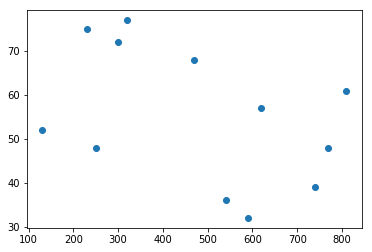

In [46]:
# here's how we make a simple scatter plot
# you will be able to find lots of documentation online for the various kinds of things matplotlib can do.

X = [590,540,740,130,810,300,320,230,470,620,770,250]
Y = [32,36,39,52,61,72,77,75,68,57,48,48]

plt.scatter(X,Y)
plt.show()

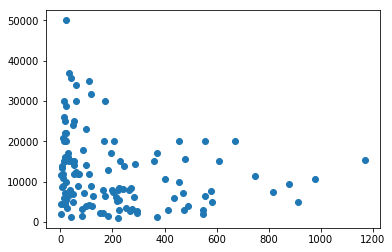

In [48]:
# Let's plot elevation against capacity. There are many ways of doing it; here we show two that both produce the same result. Uncomment and comment out (remove or add the #) to try one versus the other
df.plot.scatter('elevation', 'capacity')
# plt.scatter(df['elevation'], df['capacity'])
plt.show()

Text(0,0.5,'Capacity')

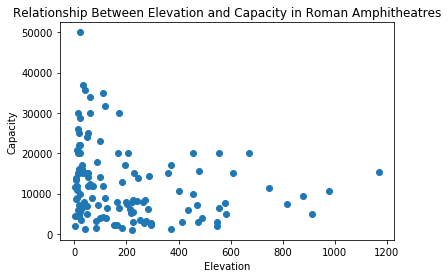

In [51]:
# Let's make the plot pretty

plt.scatter(df['elevation'], df['capacity'])
#add title
plt.title('Relationship Between Elevation and Capacity in Roman Amphitheatres')

#add x and y labels
plt.xlabel('Elevation')
plt.ylabel('Capacity')

In [67]:
# let's print the plot to raster and to vector image
# solution courtesy https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib

fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.scatter(df['elevation'], df['capacity']) 
plt.title('Relationship Between Elevation and Capacity \n in Roman Amphitheatres') # the \n is an escape character that tells the machine to insert a newline
plt.ylabel('Capacity')
plt.xlabel('Elevation')
fig.savefig('demo.png')   # save the figure to file for raster image
fig.savefig('demo.pdf') # save the figure to file for vector image
plt.close(fig)    #